# Color Identification in Images

## Import libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Working with OpenCV

The type of this input is <class 'numpy.ndarray'>
Shape: (177, 284, 3)


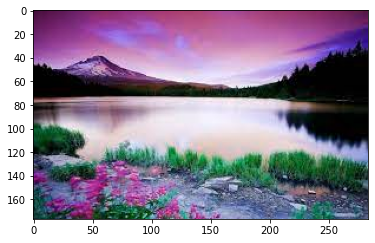

In [2]:
image = cv2.imread('sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

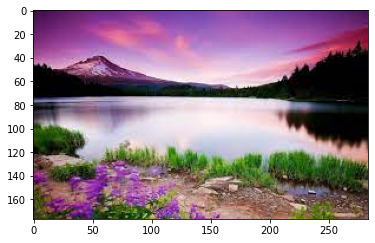

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

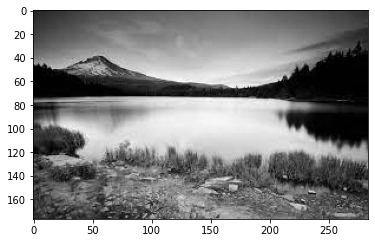

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

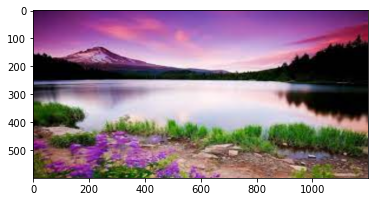

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## colour identification

In [6]:
#RGB to Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
#Read image in RGB color space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
# Color Identification
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

Get colors from an image

[array([103.33248731, 102.53662074,  64.22208122]),
 array([118.0788833 ,  49.1266295 , 119.43160044]),
 array([229.47901723, 214.32801584, 227.30768514]),
 array([ 8.68018786, 10.39971282,  6.73316581]),
 array([163.91793622,  89.93807438, 170.22219824]),
 array([52.82885536, 62.16956202, 34.15999264]),
 array([198.12592503, 157.98474821, 187.0186511 ]),
 array([152.64274967, 129.52039895, 119.37345772])]

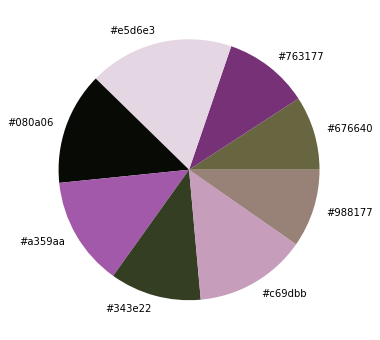

In [9]:
get_colors(get_image('sample_image.jpg'), 8, True)